# R laboratory exercises 05
### Laboratory session: April 28, 2021
### Exercises due on: May 16, 2021

#### Samuele Piccinelli, 2027650
#### samuele.piccinelli@studenti.unipd.it

In [1]:
# import libraries and useful dependencies
library(ggplot2)
library(latex2exp)
library(data.table)
library(bayestestR)
library(trapezoid)
# plot settings
options(repr.plot.width=10, repr.plot.height=5)
theme_set(theme_bw() + theme(text=element_text(family='Times New Roman', size=12), legend.text=element_text(size=12)))

#### Exercise 1
A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of $150$ interviewed people, $29$ have read the last issue of the journal.
1. What kind of distribution would you assume for $y$, the number of people that have seen the last issue of the journal?
2. Assuming a uniform prior, what is the posterior distribution for $y$?
3. Plot both posterior and likelihood ditributions functions.

***
We are looking for $P(p|n,y,M)$ and from Bayes theorem
$$P(p|n,y,M) = \frac{P(y|p,n,M) \cdot P(p|M)}{P(y|n,M)}$$

$$\left(Posterior = \frac{Likelihood \times Prior}{Evidence}\right)$$

The appropriate likelihood is the **binomial distribution**
$$P(y|p,n,M) = {n \choose y} p^y (1-p)^{n-y} \text{ with } y\leq n$$
with $n=150$, $y=29$ and model $M =$ number of people who have read the last issue of the journal, since the sample is taken from a _possible_ target audience where only two outcomes are possible, i.e. success or failure. Morover, the probability $p $ that a person has read the issue is constant in all (indipendent) interviews.

By assuming an uniform prior $P(p|M)\sim U(0,1)$ the posterior pdf is simply proportional to the Likehood.

$$P(p|y,n,m) = \frac{{n \choose y} p^y (1-p)^{n-y}}{Z} = \frac{P^*(p|y,n,m)}{Z} $$

where $Z$ is the normalization factor (evidence) and $P^*$ is the un-normalized posterior pdf ($\propto$likelihood). The mode is given by $\frac{y}{n}$ (dashed line in the first plot); the mean is calculated analitically and could be obtained by considering $U(0, 1) \sim Beta(\alpha = 1, \beta = 1)$, $\mu=\frac{1+r}{2+n}$ (dashed line in the second plot).

The normalization of the likelihood is necessary in this case only to compare it with the posterior - otherwise the two curves would have different ordinate ranges. 

In [2]:
n <- 150; r <- 29
n.sample <- 2000
delta.p <- 1/n.sample

p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
prior <- dunif(p)/sum(delta.p*sum(dunif(p)))
likelihood <- dbinom(x=r, size=n, prob=p)/(delta.p*sum(dbinom(x=r, size=n, prob=p)))
p.norm <- (likelihood * prior)/sum(delta.p*sum(likelihood*prior)) # normalized posterior

mode <- r/n
p.mean <- delta.p*sum(p*p.norm) # = (1+r)/(2+n)

In [3]:
likelihood.pdf <- data.table(p, likelihood)
p.norm.pdf <- data.table(p, p.norm)

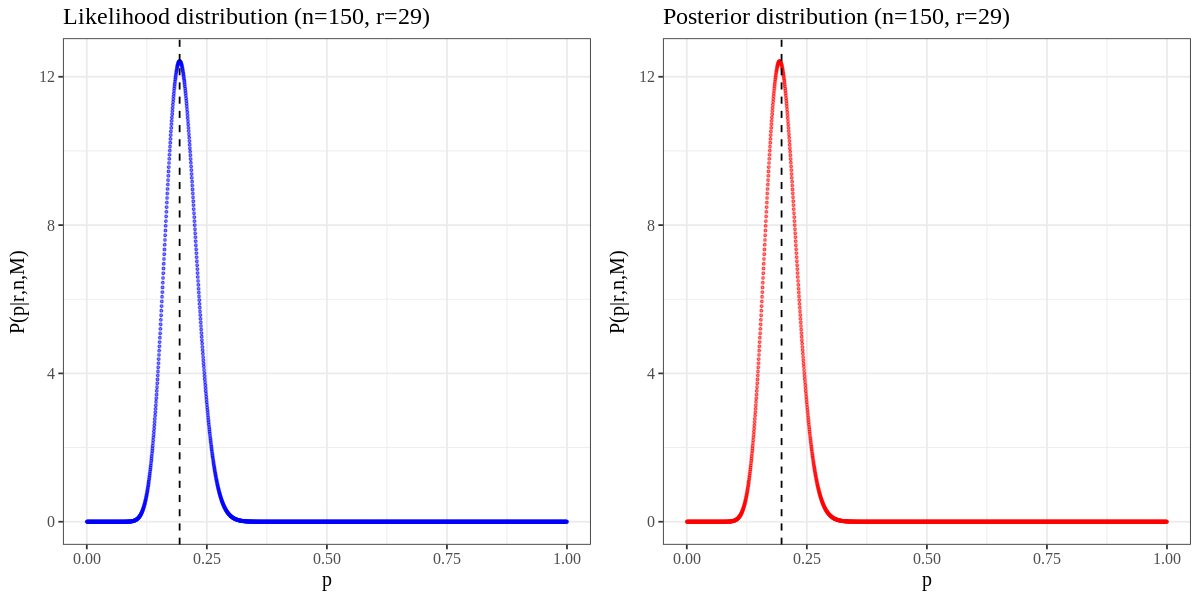

In [4]:
p1 <- ggplot(likelihood.pdf, aes(p, likelihood)) + geom_point(size=.5, alpha=0.5, col='blue') +
labs(title='Likelihood distribution (n=150, r=29)', x='p', y=TeX('$P(p|r,n,M)$')) +
geom_vline(xintercept = mode, linetype='dashed', col = 'black', size=0.5)

p2 <- ggplot(p.norm.pdf, aes(p, p.norm)) + geom_point(size=.5, alpha=0.5, col='red') +
labs(title='Posterior distribution (n=150, r=29)', x='p', y=TeX('$P(p|r,n,M)$')) +
geom_vline(xintercept = p.mean, linetype='dashed', col = 'black', size=0.5)

gridExtra::grid.arrange(p1, p2, ncol = 2, nrow = 1)

#### Exercise 2
Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.
+ Anna thinks that her prior is a beta distribution with mean $0.2$ and a standard deviation of $0.08$.
+ Benny moved only recently to this new town and therefore he does not have the slightest idea about it. Therefore he decides to use a uniform prior.
+ Chris believes that his prior should have a trapezoidal shape of the form
$$f(x)=\begin{cases}
      20x & 0 \leq x < 0.1 \\
      2 & 0.1 \leq x < 0.3 \\
      5-10x & 0.3 \leq x < 0.5 \\
      0 & x \geq 0.5
   \end{cases}$$
1. Draw and compare the three prior distributions.

The next day the three students decide to interview a sample of $100$ citizens of the small town, asking for their opinion. Out of the interviewed sample, $26$ support the building of the new concert hall.

2. Evaluate and draw the three posterior distributions.<br>
3. Give an estimate of the most probable value and the $95\%$ credibility interval.


***
The likelihood is here given by a Binomial distribution with $n=100$ and $r=26$.<br>
Given mean $\mu$ and variance $\sigma^2$, the parameters $\alpha$ and $\beta$ of the Beta distribution are given by

$$\alpha = \left(\frac{1-\mu}{\sigma^2}-\frac{1}{\mu}\right)\mu^2$$

$$\beta = \alpha\left(\frac{1}{\mu}-1\right)$$

For the posterior distributions:

| Prior | Posterior |
| :-: | :-: |
| $$Beta(\alpha_p, \beta_p)$$ | $$Beta(\alpha_p+r,\beta_p+n-r)$$ |
| $$Unif(0,1)$$ | $$Bin(n=100, r=26)$$ |
| trapez. shape | likelihood$$\times$$prior|

Normalization is here needed in order to plot all these distributions on the same graph.

For the trapezoidal distribution, the _R_ package `trapezoid` is used (documentation can be found [here](https://cran.r-project.org/web/packages/trapezoid/trapezoid.pdf)).

In [5]:
n.sample <- 2000; delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

# Anna's prior: Beta distribution
mu <- 0.2; sig <- 0.08
alpha <- ((1 - mu)/sig**2 - 1/mu)*mu**2
beta <- alpha*(1/mu - 1)
Anna <- dbeta(p,alpha,beta)/(delta.p*sum(dbeta(p,alpha,beta)))

# Benny's prior: Uniform distribution
Benny <- dunif(p)/(delta.p*sum(dunif(p)))

# Chris' prior: trapezoidal distribution
Chris <- dtrapezoid(p, min = 0, mode1 = 0.1, mode2 = 0.3, max = .5)
# alternative definition
dtrapez <- function(x){
    pdf <- ifelse((0<=x & x<0.1), 20*x, ifelse(0.1<=x & x<0.3, 2, ifelse(0.3<=x & x<0.5, 5-10*x, 0)))
    return(pdf)
}
# Chris <- dtrapez(p)/(delta.p*sum(dtrapez(p)))

In [6]:
priors <- data.table(p, Anna, Benny, Chris)
plot.priors <- reshape2::melt(priors, id='p') # to plot

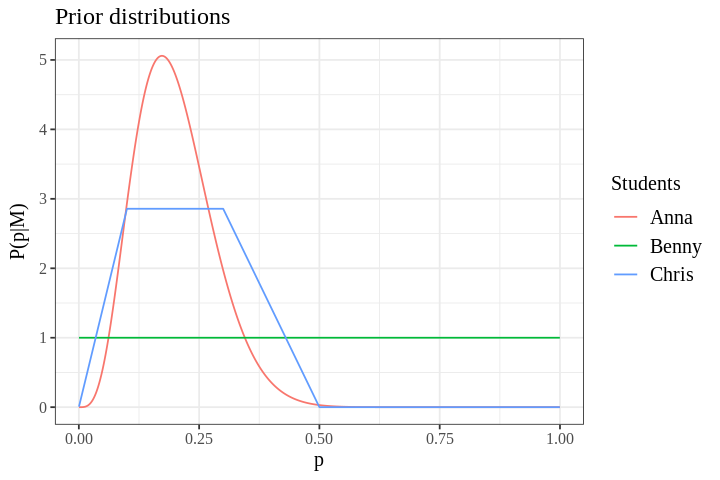

In [7]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(plot.priors, aes(p, value, col=variable)) + geom_line(size=.5) +
labs(title='Prior distributions', x='p', y=TeX('$P(p|M)$'), col='Students')

In [8]:
n <- 100; r <- 26
likelihood <- dbinom(x=r, size=n, prob=p)

# Anna's posterior distribution
post.beta <- dbeta(x=p, alpha+r, beta+n-r)
Anna <- post.beta/(delta.p*sum(post.beta))

# Benny's posterior distribution
post.unif.star <- likelihood*Benny
Benny <- post.unif.star/(delta.p*sum(post.unif.star))

# Chris' posterior distribution
post.trapez.star <- likelihood*Chris
Chris <- post.trapez.star/(delta.p*sum(post.trapez.star))

In [9]:
posteriors <- data.table(p, Anna, Benny, Chris)
plot.posteriors <- reshape2::melt(posteriors, id='p') # to plot

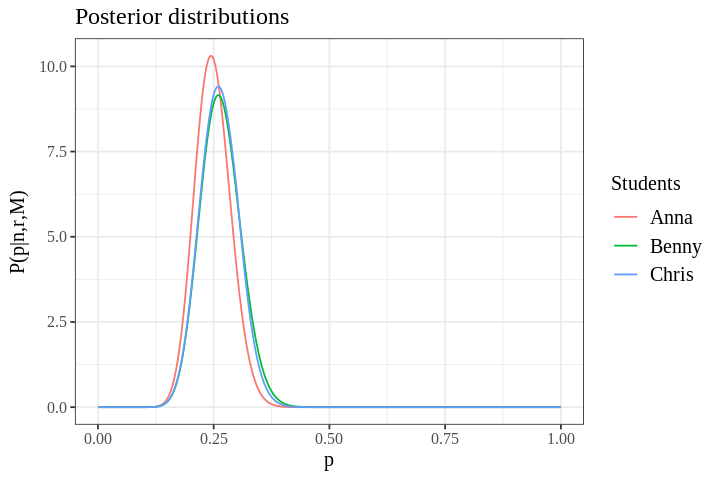

In [10]:
ggplot(plot.posteriors, aes(p, value, col=variable)) + geom_line(size=.5) +
labs(title='Posterior distributions', x='p', y=TeX('$P(p|n,r,M)$'), col='Students')

As the evidence grows (increase in sample size $n$), we are eventually led to the same conclusions irrespective of our initial beliefs: the choice of the prior of the three students becomes largely irrelevant.

The best estimate is given by the maximum of the posterior pdf $P$
$$\theta_0 = max\{P(\theta|D,M)\}$$
given by the conditions
$$\frac{dP}{d\theta}|_{\theta_0} = 0 \land \frac{d^2P}{d\theta^2}|_{\theta_0} < 0$$

The most probable value $\theta_0$ (`t0`) is given by the abscissa corresponding to the maximum of the posterior distribution; given `p` vector of uniform distributed values and `post`, vector of the corresponding sampled values from the pdf, `t0 <- p[which(post>=max(post))]`. Alternatively, the _R_ library `bayestestR` (full documentation [here](https://cran.r-project.org/web/packages/bayestestR/bayestestR.pdf)) offers the `map_estimate` function which returns
>the Highest Maximum A Posteriori probability estimate (MAP) of a posterior, i.e., the value associated with the highest probability density (the "peak" of the posterior distribution).

For the **equal-tailed** $95\%$ crediblity interval (in this definition the interval will include the median) the quantile function is exploited when possible; for the other cases the user-defined `ciET` function is used.

In [11]:
ciET <- function(p, post, delta, low=0.025){ # find CI: default 95%
    cdf <- cumsum(post)*delta
    ci <- unlist(p[low < cdf & cdf < 1-low])
    return(c(min(ci),max(ci)))
}

find.max = function(p, post){ # find MPV
    return(p[which(post>=max(post))[1]])
}

In [12]:
cat('Anna (Beta prior):')
# equivalent to p[which(Anna>=max(Anna))]
cat('\n\nMost probable value:', map_estimate(distribution_beta(10000, alpha+r,beta+n-r)))
# the same result could have been reached through
# ci(distribution_beta(10000, alpha+r,beta+n-r), ci=.95, method='ETI') of the bayestestR library or
# ciET(p, Anna, delta.p, low) as defined above
cat('\n95% credibility interval:', qbeta(c(0.025, 1-0.025), alpha+r, beta+n-r))

cat('\n\nBenny (Uniform prior):')
cat('\n\nMost probable value:', find.max(p, Benny))
cat('\n95% credibility interval:', ciET(p, Benny, delta.p))

cat('\n\nChris (Trapezoidal prior):')
cat('\n\nMost probable value:', find.max(p, Chris))
cat('\n95% credibility interval:', ciET(p, Chris, delta.p))

Anna (Beta prior):

Most probable value: 0.2444724
95% credibility interval: 0.1766865 0.3277723

Benny (Uniform prior):

Most probable value: 0.26025
95% credibility interval: 0.18425 0.35375

Chris (Trapezoidal prior):

Most probable value: 0.26025
95% credibility interval: 0.18375 0.34575

#### Exercise 3
A coin is flipped $n = 30$ times with the following outcomes:
<h4><center>T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H</center></h4>

1. Assuming a flat prior and a beta prior, plot the likelihood, prior and posterior distributions for the dataset.
2. Evaluate the most probable value for the coin probability $p$ and, integrating the posterior probability distribution, give an estimate for a $95\%$ credibility interval.
3. Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from $1$ to $30$).
4. Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

***
The likelihood is given once again by the binomial distribution with $n=30$ and $r=15$. In case of a flat prior, the likelihood coincides with the un-normalized posterior distribution. For the Beta prior the $2$ coefficients $\alpha$ and $\beta$ are choosen arbitrarly.

In [13]:
trials <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H',
            'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')
n <- length(trials) # num of trials
r <- length(trials[trials=='H']) # num of heads

In [14]:
n.sample <- 2000; delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

# Uniform prior
prior.unif <- dunif(p) # prior
post.unif <- dbinom(x=r, size=n, prob=p) # likelihood
post.unif.norm <- post.unif/(delta.p*sum(post.unif)) # normalized posterior

# Beta prior
alpha <- 5; beta <- 8 # choice for α and ß is arbitrary here
prior.beta <- dbeta(p,alpha,beta) # prior
likelihood.beta <- dbinom(x=r, size=n, prob=p) # likelihood
post.beta <- dbeta(x=p, alpha+r,beta+n-r) # posterior
post.beta.norm <- post.beta/(delta.p*sum(post.beta)) # normalized posterior

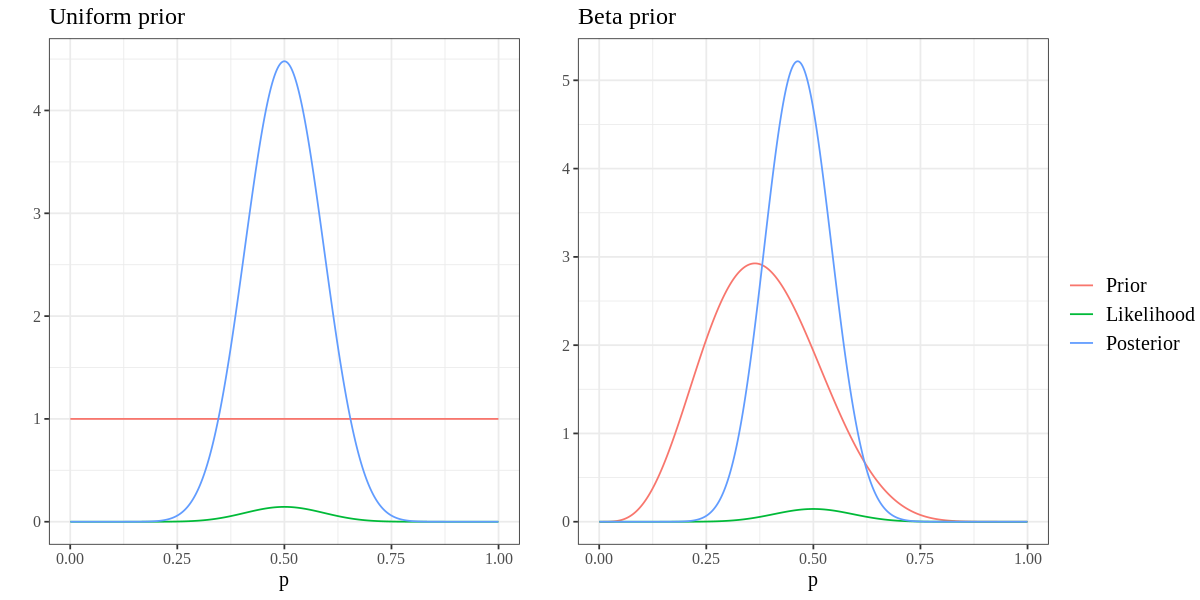

In [15]:
uniform.prior <- reshape2::melt(data.table(p, 'Prior'=prior.unif, 'Likelihood'=post.unif, 'Posterior'=post.unif.norm), id='p')
beta.prior <- reshape2::melt(data.table(p, 'Prior'=prior.beta, 'Likelihood'=likelihood.beta, 'Posterior'=post.beta.norm), id='p')

options(repr.plot.width=10, repr.plot.height=5)
p1 <- ggplot(uniform.prior, aes(p, value, col=variable)) + geom_line(size=.5) +
labs(title='Uniform prior', x='p', y='', col='')

p2 <- ggplot(beta.prior, aes(p, value, col=variable)) + geom_line(size=.5) +
labs(title='Beta prior', x='p', y='', col='')

lemon::grid_arrange_shared_legend(p1, p2, ncol = 2, nrow = 1, position='right')

In [16]:
cat('Uniform prior:')
cat('\n\nMost probable value:', find.max(p, post.unif.norm))
cat('\n95% credibility interval:', ciET(p, post.unif.norm, delta.p))

cat('\n\nBeta prior:')
cat('\n\nMost probable value:', find.max(p,post.beta.norm))
cat('\n95% credibility interval:', ciET(p, post.beta.norm, delta.p))

Uniform prior:

Most probable value: 0.49975
95% credibility interval: 0.33075 0.66875

Beta prior:

Most probable value: 0.46325
95% credibility interval: 0.32025 0.61275

In [17]:
plot.posterior <- function(post, t0, ll, ul, title, numiter){
    ggplot(post, aes(p, Posterior)) + geom_line(size=.5, col='black') +
    labs(title=paste('Number of coin tosses:',numiter), x='p', y=paste('Posterior with',title), col='') +
    geom_vline(xintercept = t0, linetype='solid', col = 'red', size=0.5) +
    geom_vline(xintercept = ll, linetype='dashed', col = 'blue', size=0.5) +
    geom_vline(xintercept = ul, linetype='dashed', col = 'blue', size=0.5)
}

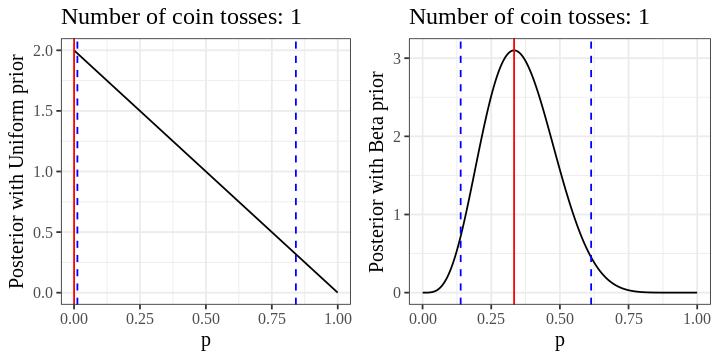

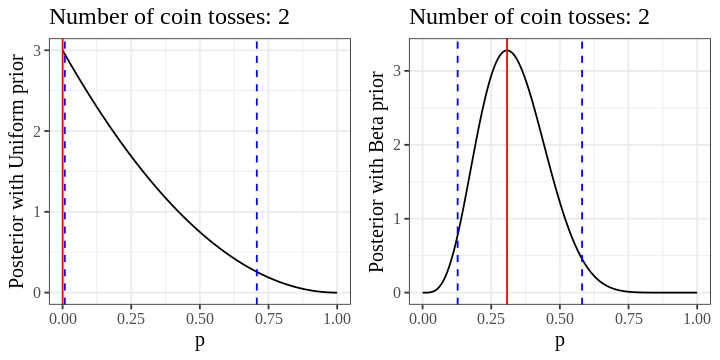

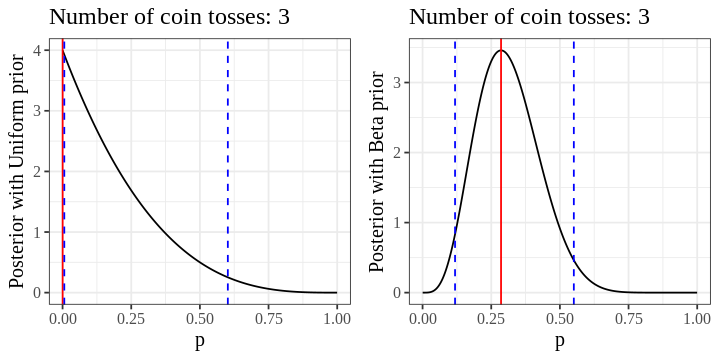

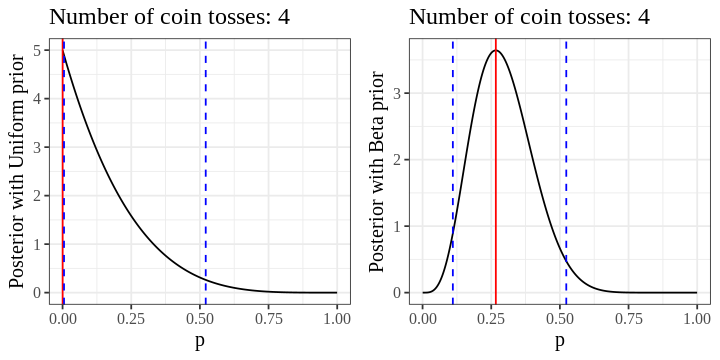

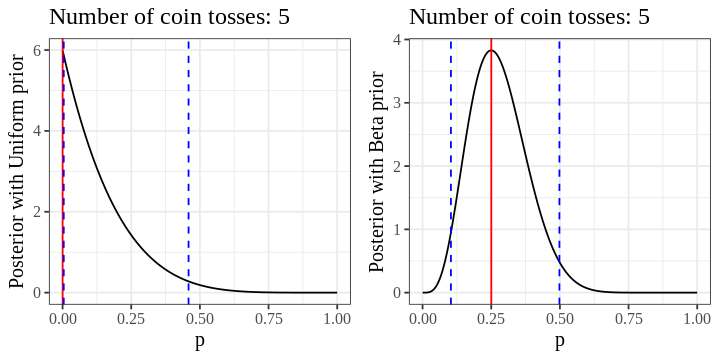

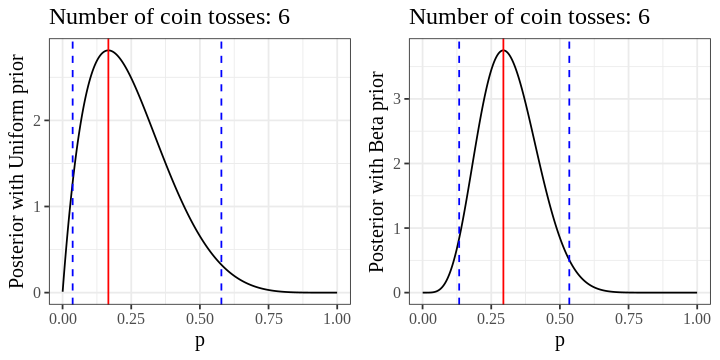

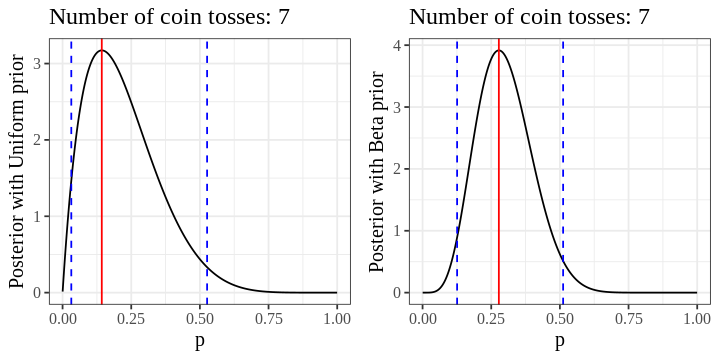

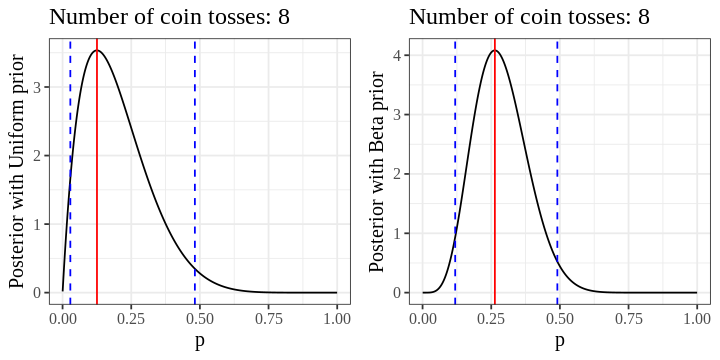

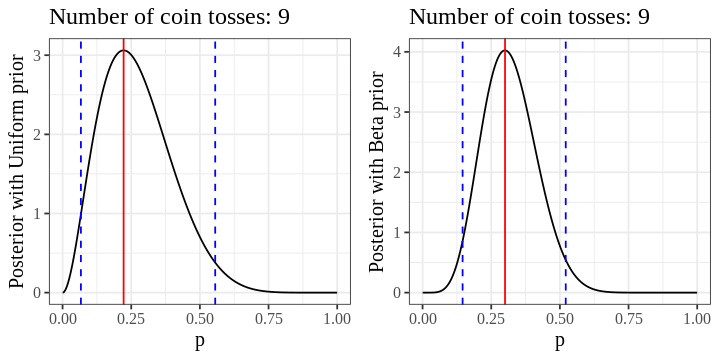

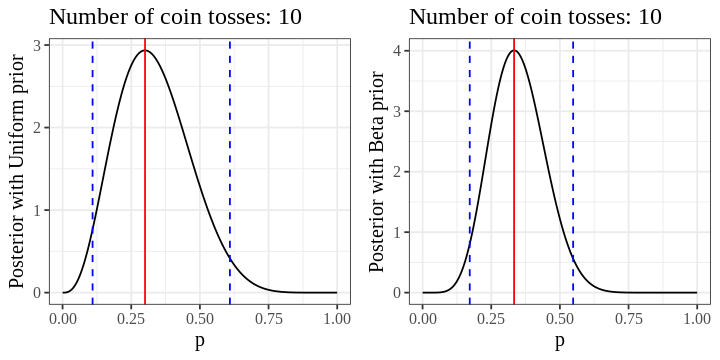

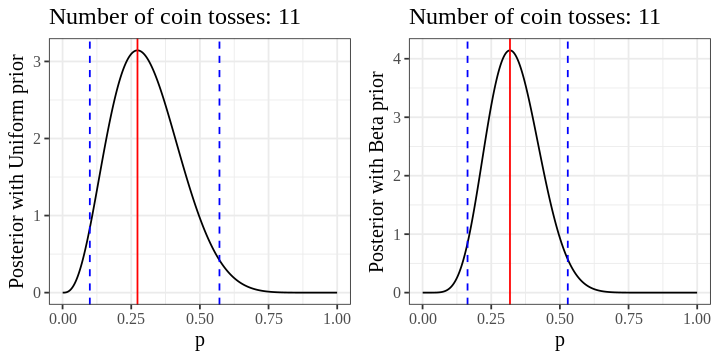

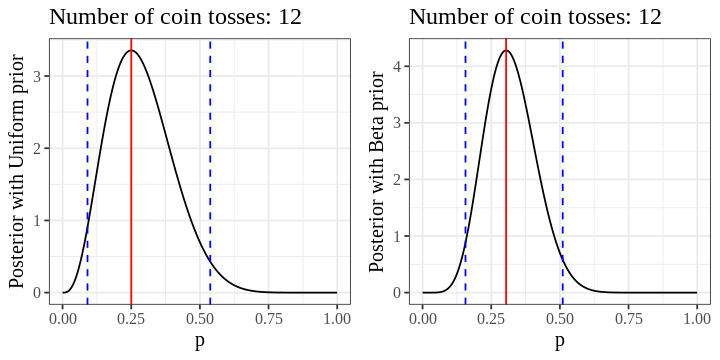

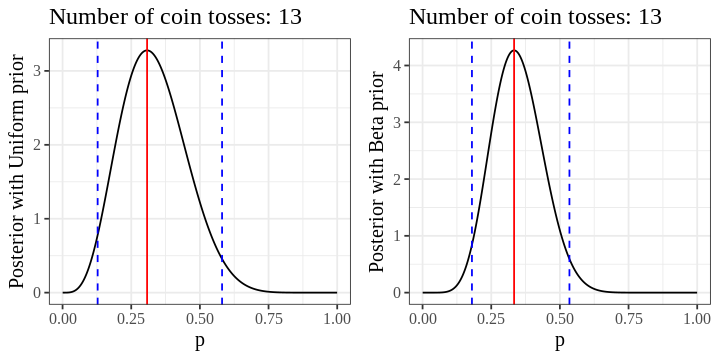

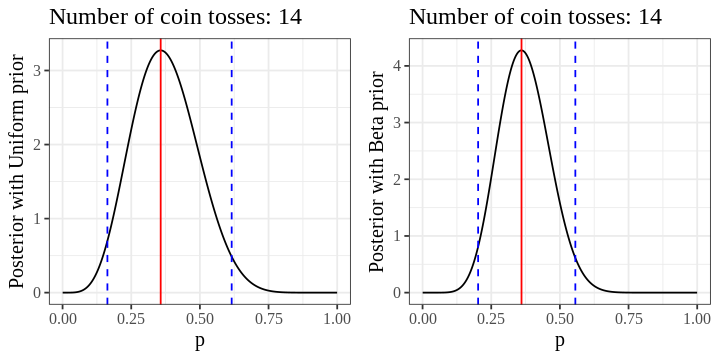

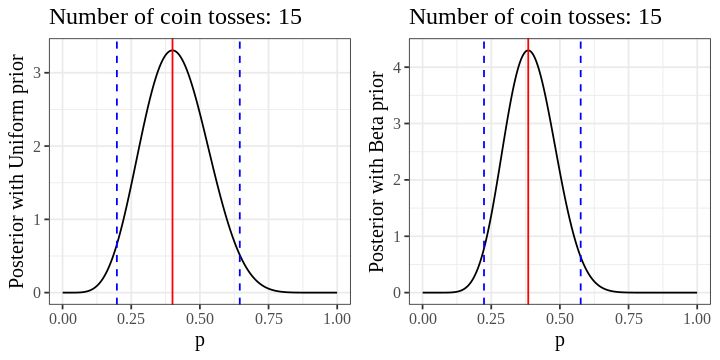

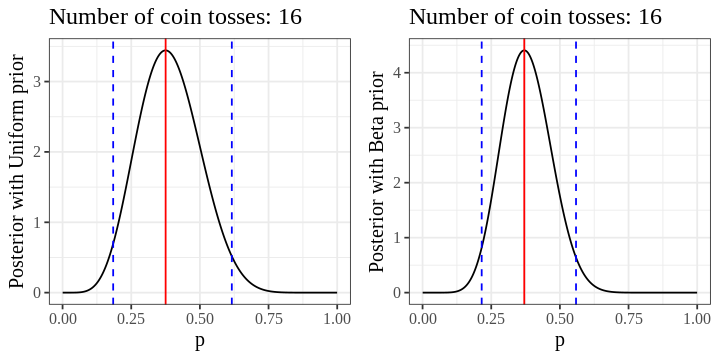

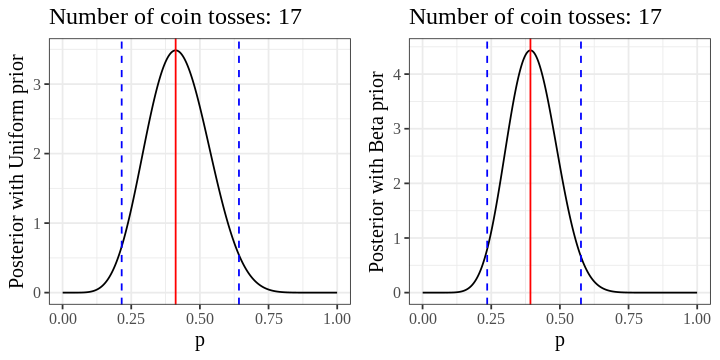

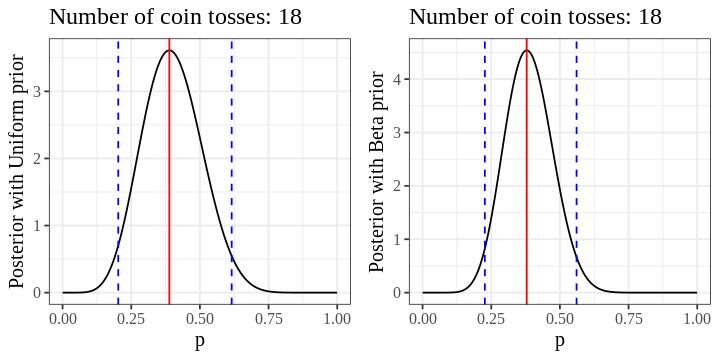

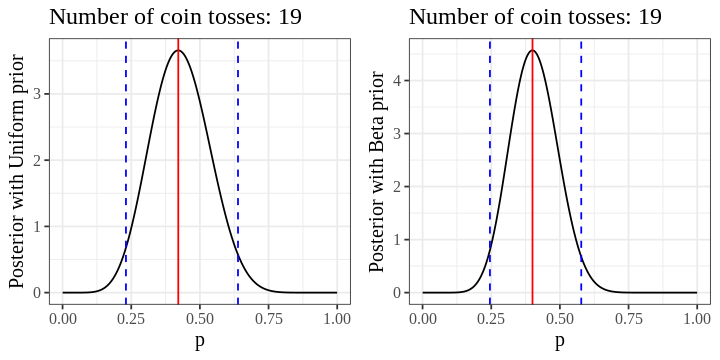

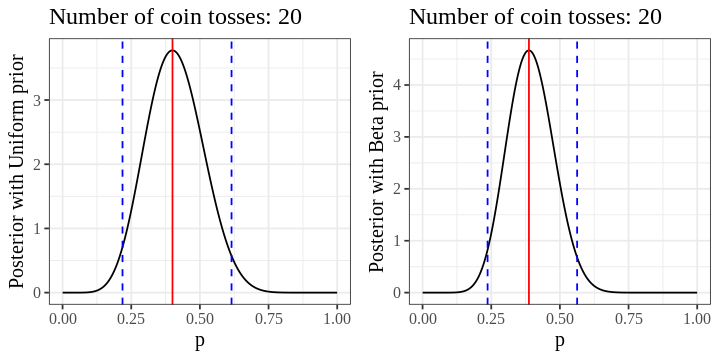

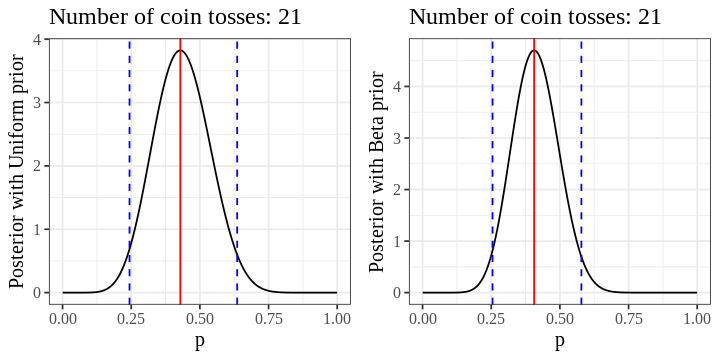

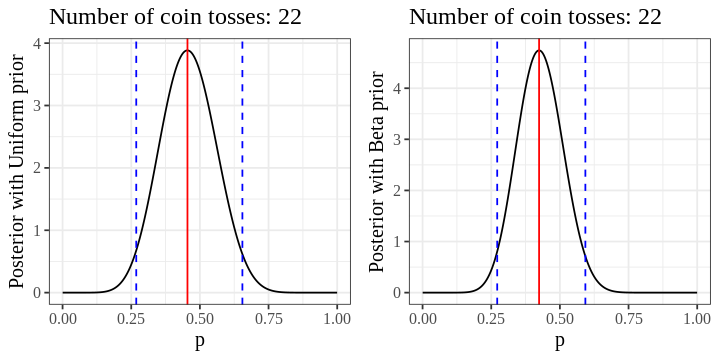

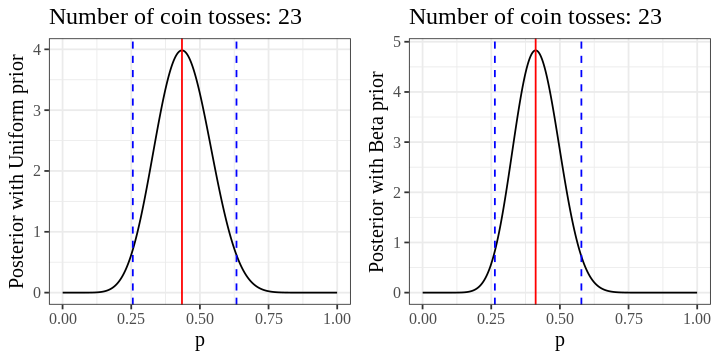

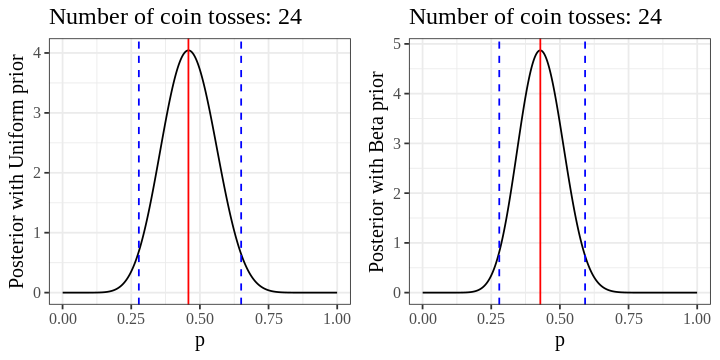

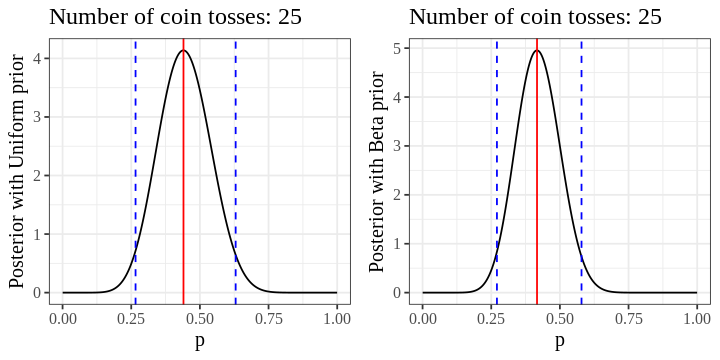

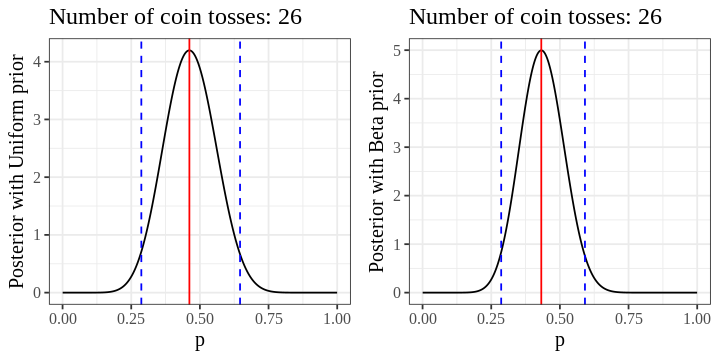

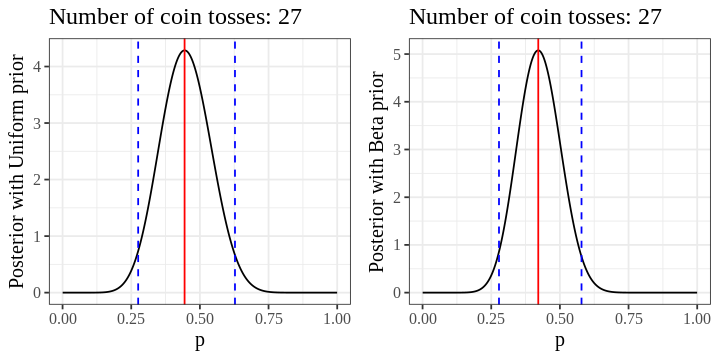

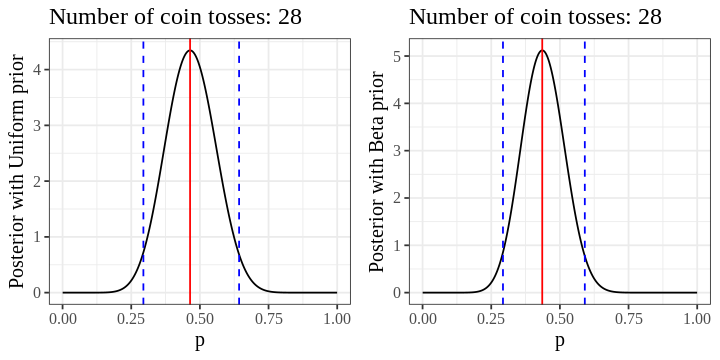

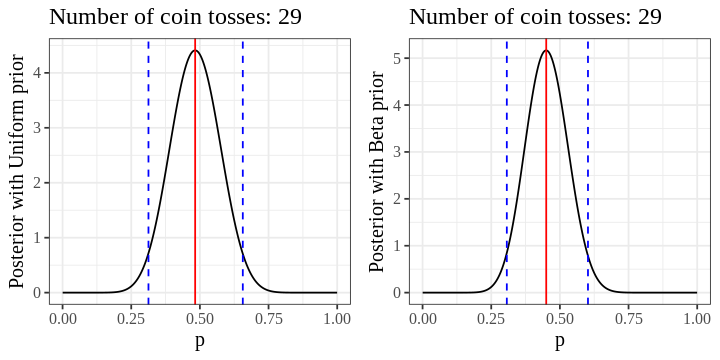

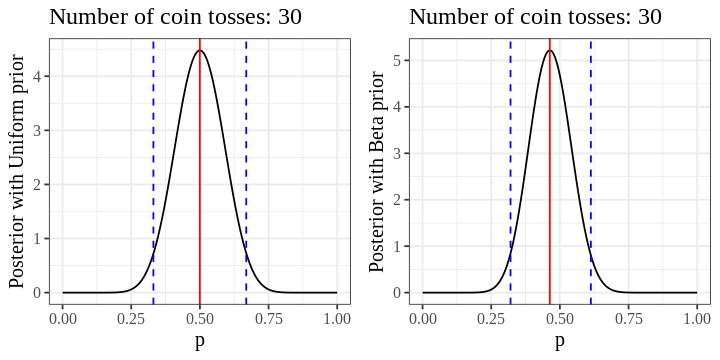

In [18]:
options(repr.plot.width=6, repr.plot.height=3)

unif.t0 <- NULL; unif.ll <- NULL; unif.ul <- NULL
beta.t0 <- NULL; beta.ll <- NULL; beta.ul <- NULL

r <- 0
num.trials <- seq(1:30)

for (n in num.trials){
    if(trials[n]=='H'){
        r <- r+1
    }
    
    # Evolution of posterior for uniform prior assumption
    post.unif <- dbinom(x=r, size=n, prob=p)  # posterior
    post.unif.norm <- post.unif/(delta.p*sum(post.unif)) # normalized posterior
    mpv.unif <- find.max(p,post.unif.norm)
    ci.unif <- ciET(p, post.unif.norm, delta.p)
    
    # Evolution of posterior for beta prior assumption
    post.beta <- dbeta(x=p, alpha+r,beta+n-r) # posterior
    post.beta.norm <- post.beta/(delta.p*sum(post.beta)) # normalized posterior
    mpv.beta <- find.max(p,post.beta.norm)
    ci.beta <- ciET(p, post.beta.norm, delta.p)
    
    # append values for later plotting
    unif.t0 <- append(unif.t0, mpv.unif)
    unif.ll <- append(unif.ll, ci.unif[1])
    unif.ul <- append(unif.ul, ci.unif[2])
    
    beta.t0 <- append(beta.t0, mpv.beta)
    beta.ll <- append(beta.ll, ci.beta[1])
    beta.ul <- append(beta.ul, ci.beta[2])
    
    # plot evolution of both posteriors
    uniform.prior <- data.table(p, 'Posterior'=post.unif.norm)
    beta.prior <- data.table(p, 'Posterior'=post.beta.norm)
    
    p1 <- plot.posterior(uniform.prior, mpv.unif, ci.unif[1], ci.unif[2], 'Uniform prior', n)
    p2 <- plot.posterior(beta.prior, mpv.beta, ci.beta[1], ci.beta[2], 'Beta prior', n)
    
    gridExtra::grid.arrange(p1, p2, ncol = 2, nrow = 1)   
}

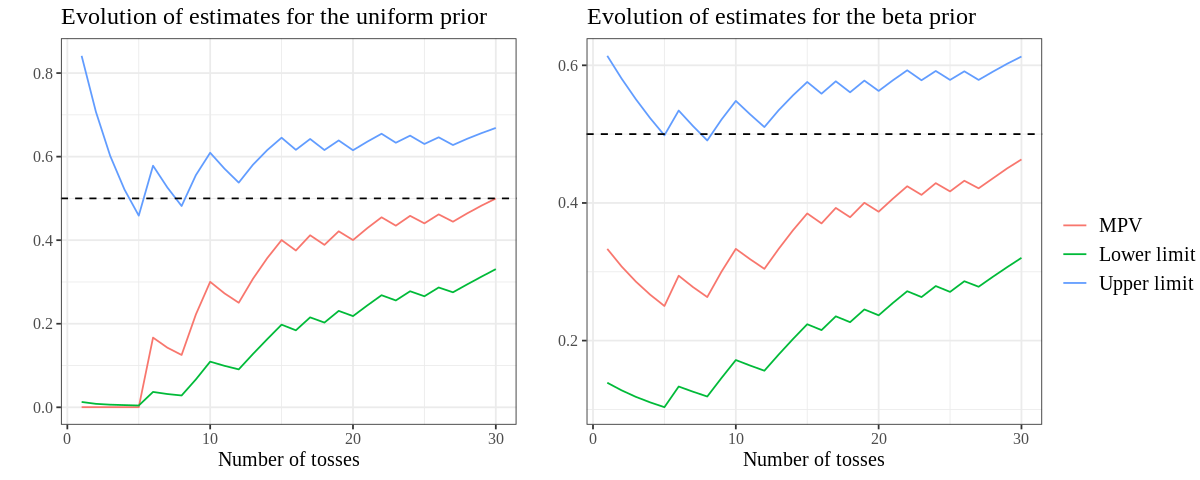

In [19]:
estimates.unif <- reshape2::melt(data.table(num.trials,'MPV'=unif.t0,'Lower limit'=unif.ll,'Upper limit'=unif.ul), id='num.trials')
estimates.beta <- reshape2::melt(data.table(num.trials,'MPV'=beta.t0,'Lower limit'=beta.ll,'Upper limit'=beta.ul), id='num.trials')

options(repr.plot.width=10, repr.plot.height=4)
p1 <- ggplot(estimates.unif, aes(num.trials, value, col=variable)) + geom_line(size=.5) +
labs(title='Evolution of estimates for the uniform prior', x='Number of tosses', y='', col='') +
geom_hline(yintercept = 0.5, linetype='dashed', col = 'black', size=0.5)

p2 <- ggplot(estimates.beta, aes(num.trials, value, col=variable)) + geom_line(size=.5) +
labs(title='Evolution of estimates for the beta prior', x='Number of tosses', y='', col='') +
geom_hline(yintercept = 0.5, linetype='dashed', col = 'black', size=0.5)

lemon::grid_arrange_shared_legend(p1, p2, ncol = 2, nrow = 1, position='right')

From the plots above it can be seen how the most probable value (MPV) shifts towards $0.5$ with the increase of the iterations $n$, as expected. 

Moreover, there is no difference between analyzing the data sequentially and considering the data as a whole. The plots above give the same result as for what has been observed for $n=30$ using both uniform and beta as prior.